Implementing Feedforward neural networks with Keras and TensorFlow for
classification of hand-written MNIST dataset using below steps:
a. Import the necessary packages
b. Load the training and testing data
c. Define the network architecture using Keras
d. Train the model using SGD with 11 epochs
e. Evaluate the network
f. Plot the training loss and accuracy

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(f"Tensorflow Version : {tf.__version__}")

Tensorflow Version : 2.17.0


In [4]:
train_csv_file = 'mnist_train.csv'
test_csv_file = 'mnist_test.csv'

print(f"Loading data from {train_csv_file} and {test_csv_file}..")

Loading data from mnist_train.csv and mnist_test.csv..


In [5]:
train_df = pd.read_csv(train_csv_file)
test_df = pd.read_csv(test_csv_file)
print("Data loaded successfully.")

Data loaded successfully.


In [6]:
y_train = train_df['label'].values
x_train = train_df.drop('label',axis=1).values

y_test = test_df['label'].values
x_test = test_df.drop('label', axis=1).values

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
y_train_categorical = tf.keras.utils.to_categorical(y_train,10)
y_test_categorical = tf.keras.utils.to_categorical(y_test,10)

print(f"X_train shape : {x_train.shape}")
print(f"y_train_categorical shape : {y_train_categorical.shape}")
print(f"X_train shape : {x_test.shape}")
print(f"y_train_categorical shape : {y_test_categorical.shape}")

X_train shape : (60000, 784)
y_train_categorical shape : (60000, 10)
X_train shape : (10000, 784)
y_train_categorical shape : (10000, 10)


In [9]:
model = Sequential()
model.add(Dense(512,activation='relu', input_shape = (784,)))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

C:\Users\ishan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
print("\nModel Architecture : ")
model.summary()


Model Architecture : 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
print("\nStarting model training...")
history = model.fit(x_train, y_train_categorical,
                    epochs=11,
                    batch_size=32,
                    validation_data=(x_test,y_test_categorical),
                    verbose=1)
print("Training finished")


Starting model training...
Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6973 - loss: 1.0544 - val_accuracy: 0.9188 - val_loss: 0.2887
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.3421 - val_accuracy: 0.9333 - val_loss: 0.2258
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9234 - loss: 0.2617 - val_accuracy: 0.9454 - val_loss: 0.1851
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9371 - loss: 0.2175 - val_accuracy: 0.9534 - val_loss: 0.1599
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9462 - loss: 0.1872 - val_accuracy: 0.9575 - val_loss: 0.1423
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9495 - loss: 0.1710 - val_accuracy: 0.9603 - val_loss: 0.1298
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9542 - loss: 0.1563 - val_accuracy: 0.9631 - val_loss: 0.1188
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accura

In [13]:
print("\nEvaluating model on test data....")
test_loss, test_accurancy = model.evaluate(x_test, y_test_categorical, verbose= 0)

print(f"\n Test Loss : {test_loss:.4f}")
print(f"Test Accurancy : {test_accurancy*100:.2f}%")



Evaluating model on test data....

 Test Loss : 0.0933
Test Accurancy : 97.11%


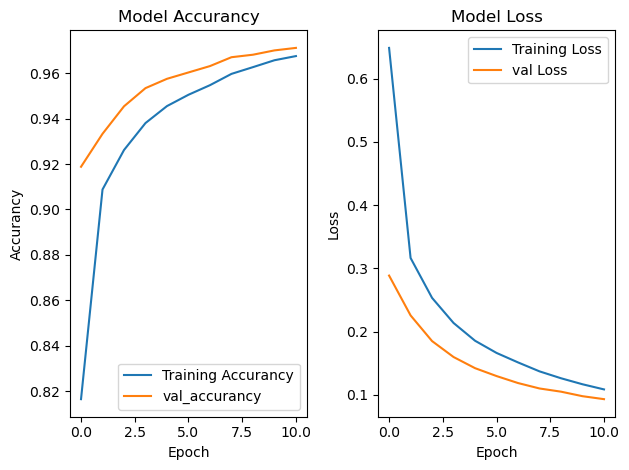

In [17]:
plt.figure(figure=(12,5))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'],label='Training Accurancy')

plt.plot(history.history['val_accuracy'], label='val_accurancy')

plt.title('Model Accurancy')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'Training Loss')

plt.plot(history.history['val_loss'],label = 'val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()